In [17]:
import json
import numpy as np

with open(r"C:\Users\BOOMI\Downloads\primate_dataset.json", "r") as file:
    data = json.load(file)

num_samples = len(data)
print("Number of samples before duplication:", num_samples)

num_duplicates = 5

duplicated_data = data * num_duplicates


num_duplicated_samples = len(duplicated_data)
print("Number of samples after duplication:", num_duplicated_samples)

num_samples_to_balance_to = 2000

num_additional_duplicates = (num_samples_to_balance_to - num_samples) // num_samples

balanced_data = data + (data * num_additional_duplicates)

num_balanced_samples = len(balanced_data)
print("Number of samples after balancing:", num_balanced_samples)

Number of samples before duplication: 2003
Number of samples after duplication: 10015
Number of samples after balancing: 2003


In [18]:
print("Balanced Data:")
max_samples_to_display = 10 # Change this value to adjust the number of samples to display
for i, sample in enumerate(balanced_data[:max_samples_to_display]):
    print(f"Sample {i + 1}: {sample}")

Balanced Data:
Sample 1: {'post_title': "I don't feel original anymore.", 'post_text': "When I was in high school a few years back, I was one of the highest competitors in my school. I joined the high school band in freshman year and by senior year I became one of the best in my section. My academics were always straight and I exercised daily. Senior year I enlisted in the military and now I believe it was one of my worst decisions in life. Before I went to boot camp I was motivated, a patriot and believed that the elite joined the military. In senior year I never applied for any scholarships and I was offered one but turned it down because I already signed the papers. I thought I set myself up for success. Now I believe I was dead wrong for joining. The only benefit I see so far after a year and a half of service is that I'm trying to set myself up financially before I get out and hopefully attend college. It sounds like a plan but I feel no happiness from what I do at all. I convince

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

def flatten_annotations(annotations):
    return ', '.join([label for sublist in annotations for label in sublist])

balanced_data_flattened = [(flatten_annotations(item['annotations']), item['post_text']) for item in balanced_data]

train_data, test_data = train_test_split(balanced_data_flattened, test_size=0.2, random_state=42)

train_df = pd.DataFrame(train_data, columns=['annotations', 'post_text'])
test_df = pd.DataFrame(test_data, columns=['annotations', 'post_text'])

X_train = train_df['annotations']
y_train = train_df['annotations'].apply(lambda x: x.split(',')[1].strip()) # Extract labels
X_test = test_df['annotations']
y_test = test_df['annotations'].apply(lambda x: x.split(',')[1].strip()) # Extract labels

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

y_test_transformed = []
for label in y_test:
    if label in label_encoder.classes_:
        y_test_transformed.append(label_encoder.transform([label])[0])
    else:
        y_test_transformed.append(-1)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = DecisionTreeClassifier()
model.fit(X_train_vec, y_train)


DecisionTreeClassifier()

In [20]:
print("Testing dataset:")
for i, (post_text, annotations) in enumerate(test_data):
    print(f"Sample {i+1}:")
    print("Post Text:", post_text)
    print("Annotations:", annotations)
    print()


Testing dataset:
Sample 1:
Post Text: Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down, yes, Feeling-down-depressed-or-hopeless, yes, Feeling-tired-or-having-little-energy, yes, Little-interest-or-pleasure-in-doing , yes, Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual, no, Poor-appetite-or-overeating, no, Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way, no, Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television, yes, Trouble-falling-or-staying-asleep-or-sleeping-too-much, no
Annotations: Hello. I (23F) have tried to make a post to explain what's going on with me, but I just end up crying, and everything I write is incoherent, so. Sorry if there's not enough context?

I'm having a really difficult time right now. I can't really focus on work, and I don't get in as ma

In [21]:
y_pred = model.predict(X_test_vec)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
for prediction in y_pred_decoded:
    print(prediction)


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
no
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
y

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_transformed, y_pred)
precision = precision_score(y_test_transformed, y_pred, average='weighted')
recall = recall_score(y_test_transformed, y_pred, average='weighted')
f1 = f1_score(y_test_transformed, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.885286783042394
Precision: 0.8785033850311831
Recall: 0.885286783042394
F1 Score: 0.8652441928885651


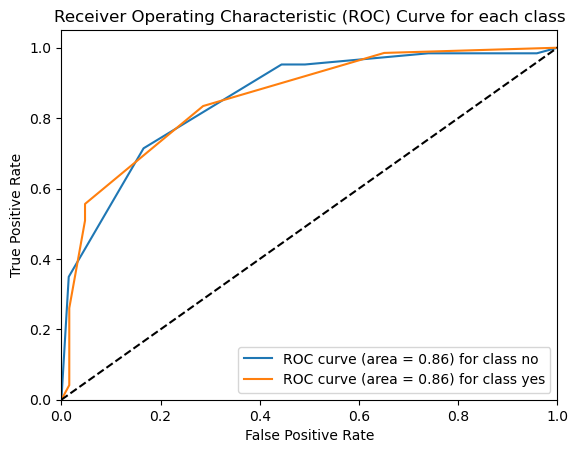

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming y_pred contains probabilities for each class
y_pred_proba = model.predict_proba(X_test_vec)

for i in range(len(label_encoder.classes_)):
    y_true_class = np.array([1 if label == i else 0 for label in y_test_transformed])
    y_pred_class = y_pred_proba[:, i]  # Extract probabilities for class i
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_pred_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], label_encoder.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

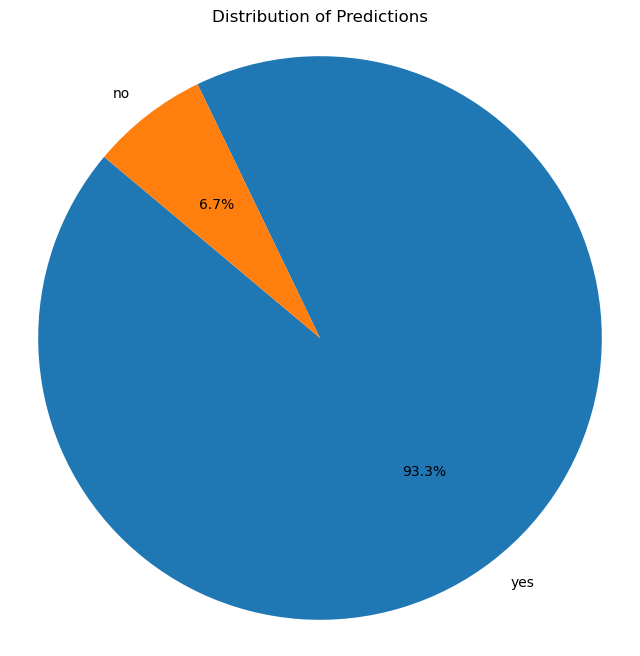

In [24]:
y_pred = model.predict(X_test_vec)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
prediction_counts = pd.Series(y_pred_decoded).value_counts()
plt.figure(figsize=(8, 8))
prediction_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predictions')
plt.axis('equal')
plt.show()

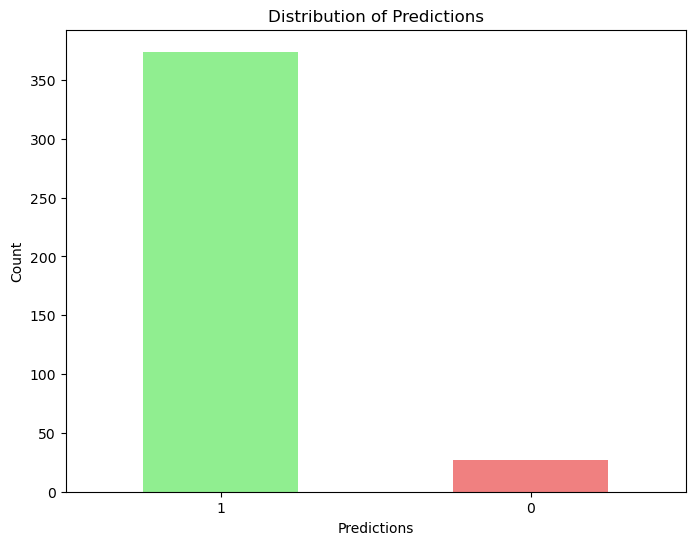

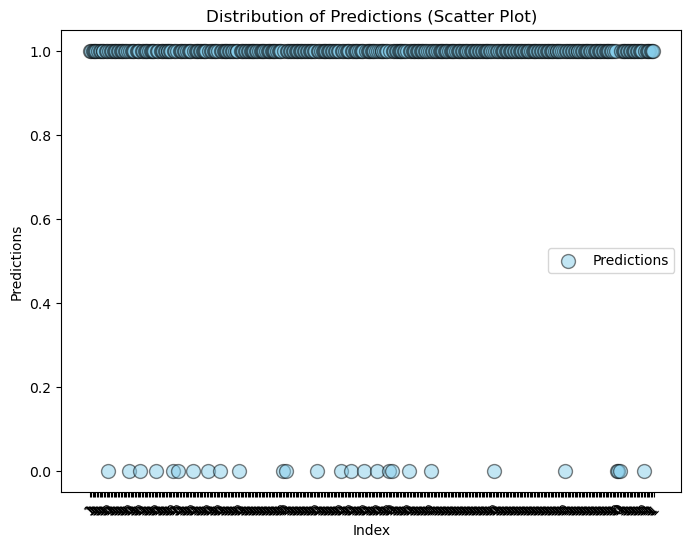

In [25]:
prediction_df = pd.DataFrame({'Prediction': y_pred})

prediction_counts = prediction_df['Prediction'].value_counts()

plt.figure(figsize=(8, 6))
prediction_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Distribution of Predictions')
plt.xlabel('Predictions')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

import numpy as np
np.random.seed(42)
jitter = np.random.uniform(low=-0.3, high=0.3, size=len(prediction_df))

plt.figure(figsize=(8, 6))
plt.scatter(prediction_df.index + jitter, prediction_df['Prediction'], alpha=0.5, color='skyblue', edgecolor='black', s=100, label='Predictions')
plt.xticks(ticks=prediction_df.index, labels=prediction_df['Prediction'], rotation=45)
plt.title('Distribution of Predictions (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Predictions')
plt.legend()
plt.show()


In [26]:
import pickle

In [27]:
filename="myModel.pkl"
pickle.dump(model,open(filename,"wb"))

In [28]:
import joblib
mm=joblib.load("myModel.pkl")

In [29]:
y_pd = mm.predict(X_test_vec)
y_pd

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
print(X_test_vec)

  (0, 0)	0.05156069615129082
  (0, 1)	0.05159287131373978
  (0, 2)	0.05156069615129082
  (0, 3)	0.05156069615129082
  (0, 4)	0.05159287131373978
  (0, 5)	0.05156069615129082
  (0, 6)	0.05156069615129082
  (0, 7)	0.05156069615129082
  (0, 8)	0.05156069615129082
  (0, 9)	0.05156069615129082
  (0, 10)	0.05156069615129082
  (0, 11)	0.05159287131373978
  (0, 12)	0.05156069615129082
  (0, 13)	0.05156069615129082
  (0, 14)	0.05159287131373978
  (0, 15)	0.05156069615129082
  (0, 16)	0.10312139230258165
  (0, 17)	0.05156069615129082
  (0, 18)	0.05156069615129082
  (0, 19)	0.05156069615129082
  (0, 20)	0.05156069615129082
  (0, 21)	0.15468208845387246
  (0, 22)	0.05156069615129082
  (0, 23)	0.15468208845387246
  (0, 24)	0.05156069615129082
  :	:
  (400, 49)	0.051561468174315506
  (400, 50)	0.051561468174315506
  (400, 51)	0.051561468174315506
  (400, 52)	0.10312293634863101
  (400, 53)	0.051561468174315506
  (400, 54)	0.051561468174315506
  (400, 55)	0.051561468174315506
  (400, 56)	0.0515936438